In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-HR-Employee-Attrition.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [31]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)


In [32]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0

In [33]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')

Real-World Impact
Employee attrition affects company productivity, morale, and cost.
By analyzing this dataset, organizations can:
- Improve employee retention
- Identify root causes of attrition (e.g., long hours, low pay)
- Optimize hiring and internal policies

# **EDA**

<ipython-input-34-88944820a62d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


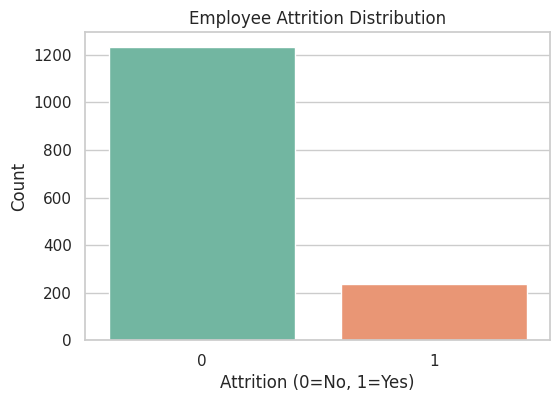

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Employee Attrition Distribution')
plt.xlabel('Attrition (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

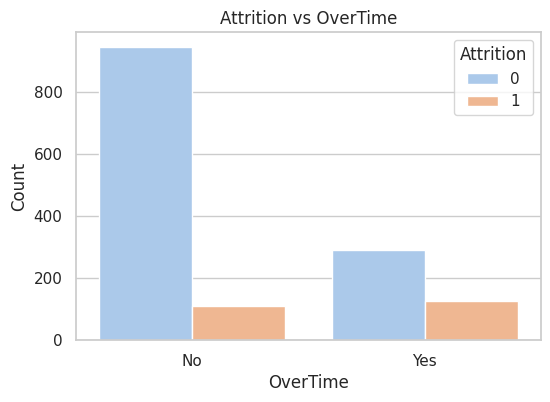

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='pastel')
plt.title('Attrition vs OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.show()

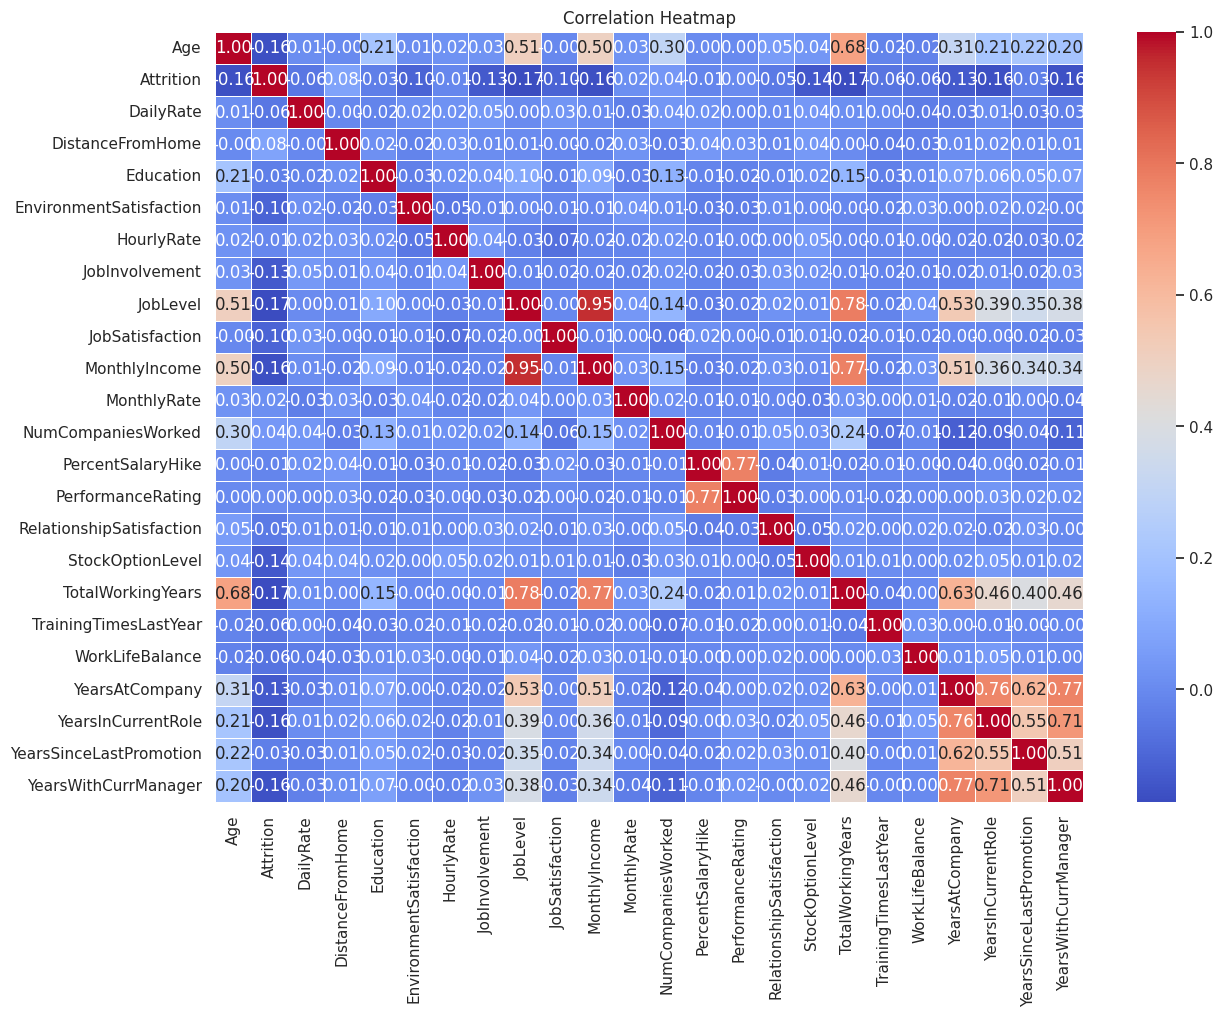

In [36]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-37-689c94f5e366>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Set3')


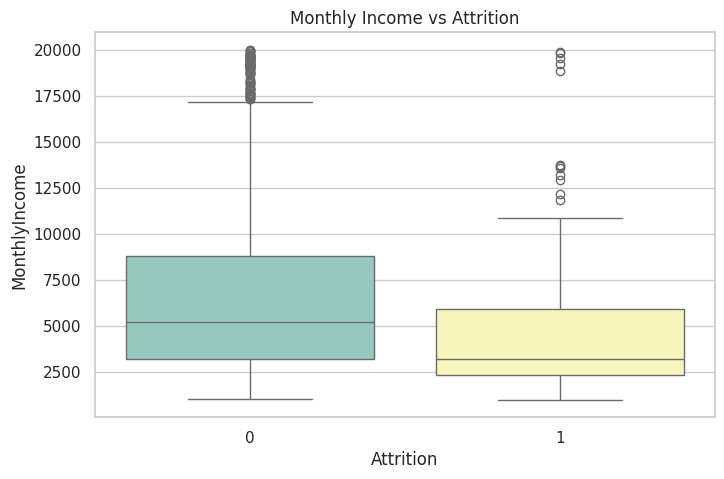

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Set3')
plt.title('Monthly Income vs Attrition')
plt.show()


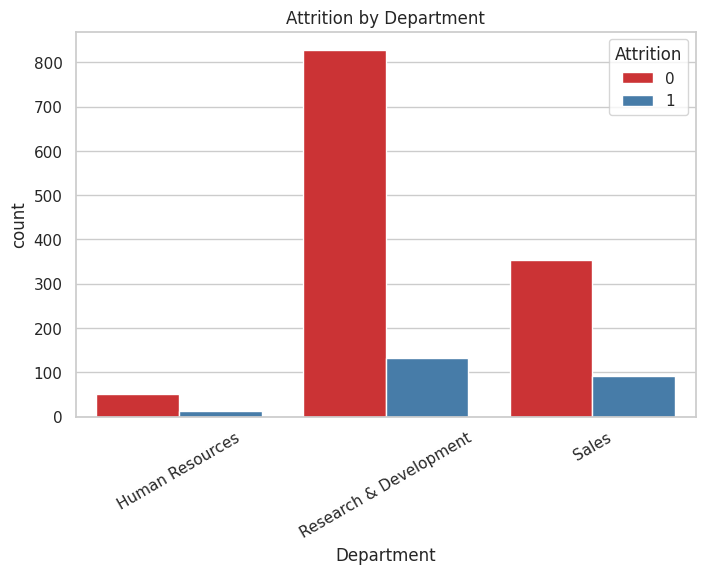

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition by Department')
plt.xticks(rotation=30)
plt.show()

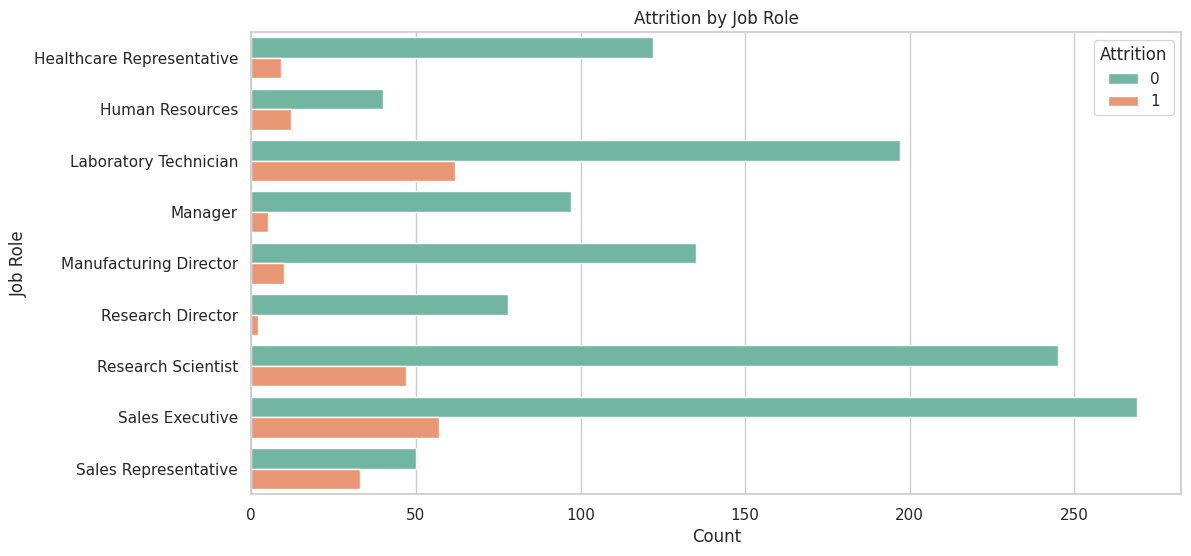

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(y='JobRole', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition by Job Role')
plt.ylabel('Job Role')
plt.xlabel('Count')
plt.show()

<ipython-input-48-04c6d143614e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jobrole_attrition = df.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False) * 100
<ipython-input-48-04c6d143614e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jobrole_attrition.values, y=jobrole_attrition.index, palette='rocket')


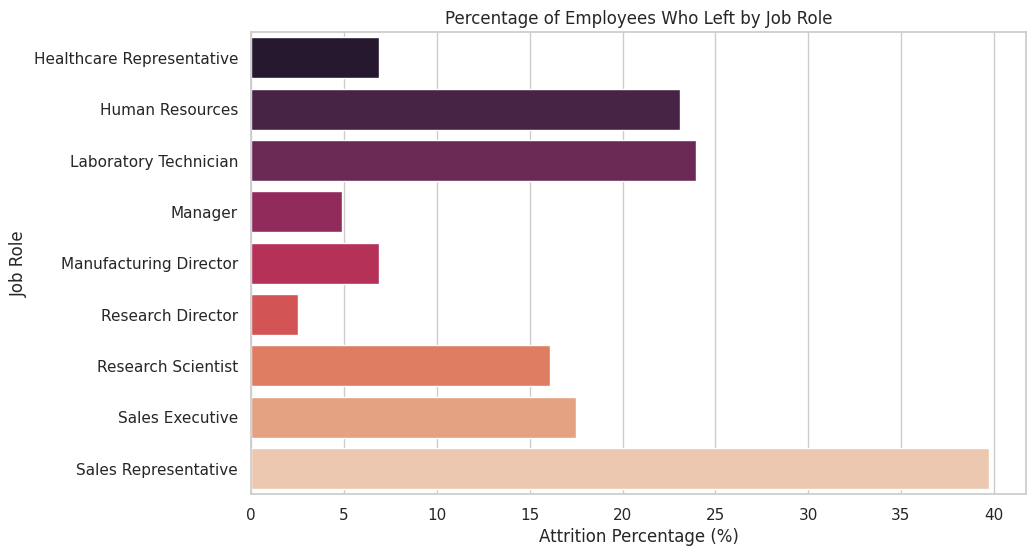

In [48]:

# 3.6.1 Percentage of employees who left in each Job Role
jobrole_attrition = df.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False) * 100
plt.figure(figsize=(10,6))
sns.barplot(x=jobrole_attrition.values, y=jobrole_attrition.index, palette='rocket')
plt.title('Percentage of Employees Who Left by Job Role')
plt.xlabel('Attrition Percentage (%)')
plt.ylabel('Job Role')
plt.show()

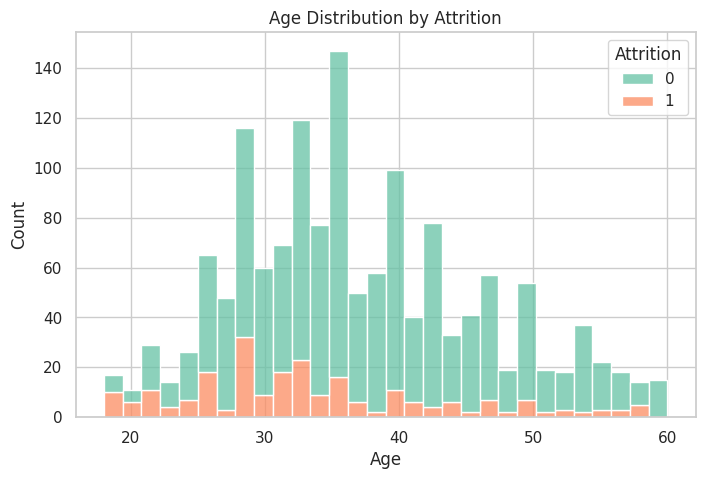

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', palette='Set2', bins=30)
plt.title('Age Distribution by Attrition')
plt.show()

<ipython-input-41-d92a90b749c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, palette='Set1')


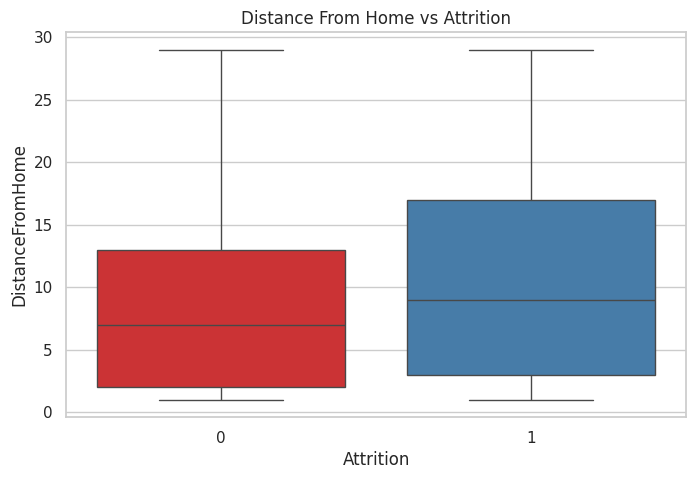

In [41]:

plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, palette='Set1')
plt.title('Distance From Home vs Attrition')
plt.show()

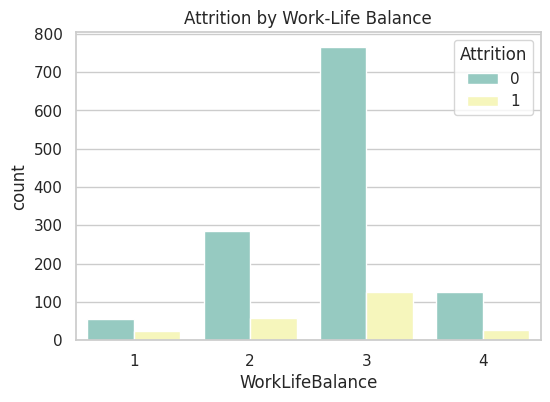

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition by Work-Life Balance')
plt.show()


<ipython-input-50-3073c74a686e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worklifebalance_attrition.values, y=worklifebalance_attrition.index, palette='rocket')


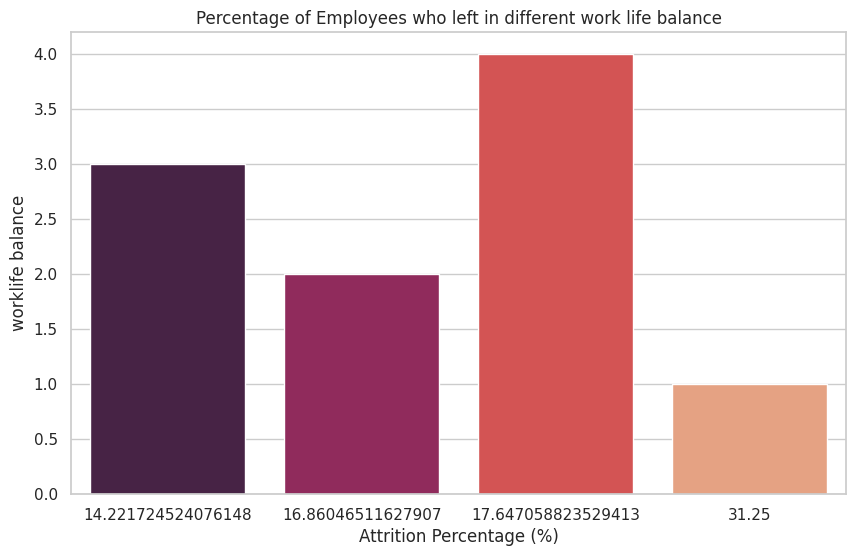

In [50]:
worklifebalance_attrition = df.groupby('WorkLifeBalance')['Attrition'].mean().sort_values(ascending=False) * 100
plt.figure(figsize=(10,6))
sns.barplot(x=worklifebalance_attrition.values, y=worklifebalance_attrition.index, palette='rocket')
plt.title('Percentage of Employees who left in different work life balance')
plt.xlabel('Attrition Percentage (%)')
plt.ylabel('worklife balance')
plt.show()

# - Pairplot of top features
# - Attrition vs Job Satisfaction, Environment Satisfaction
# - Violin plots for distribution analysis
# - Feature importance using models

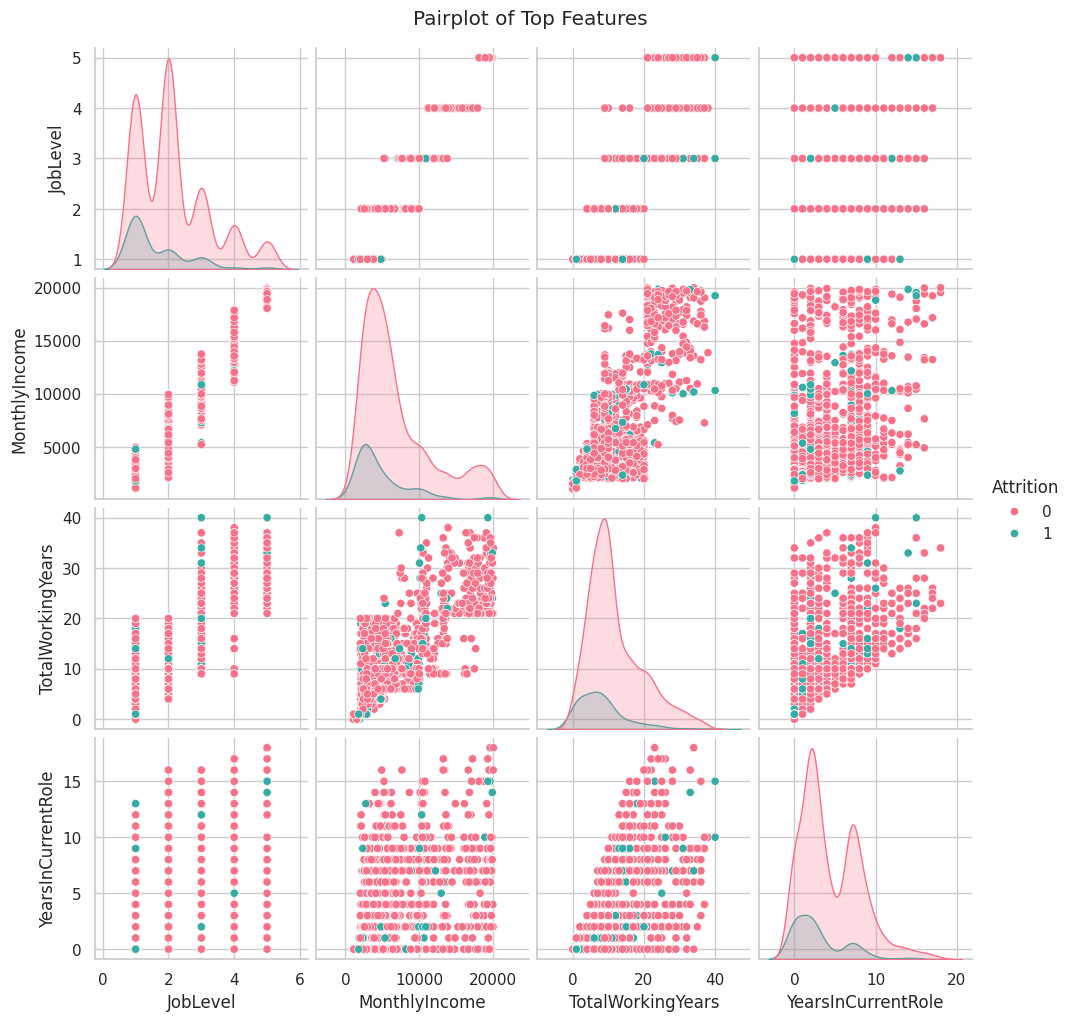

In [43]:

# 4.1 Pairplot of top correlated features with Attrition
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop('Attrition', axis=1)._get_numeric_data()
y = df['Attrition']
selector = SelectKBest(score_func=f_classif, k=4)
X_new = selector.fit_transform(X, y)
top_features = X.columns[selector.get_support()]

sns.pairplot(df[top_features.tolist() + ['Attrition']], hue='Attrition', palette='husl')
plt.suptitle('Pairplot of Top Features', y=1.02)
plt.show()



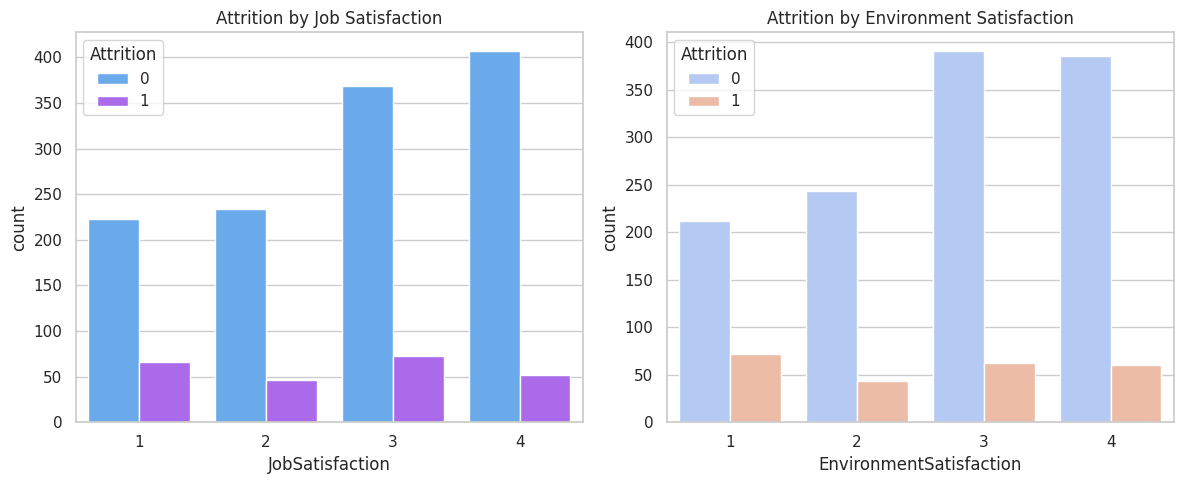

In [44]:
# 4.2 Attrition vs Job Satisfaction & Environment Satisfaction
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='cool', ax=axs[0])
axs[0].set_title('Attrition by Job Satisfaction')
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette='coolwarm', ax=axs[1])
axs[1].set_title('Attrition by Environment Satisfaction')
plt.tight_layout()
plt.show()


<ipython-input-47-c9ba6461cefa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


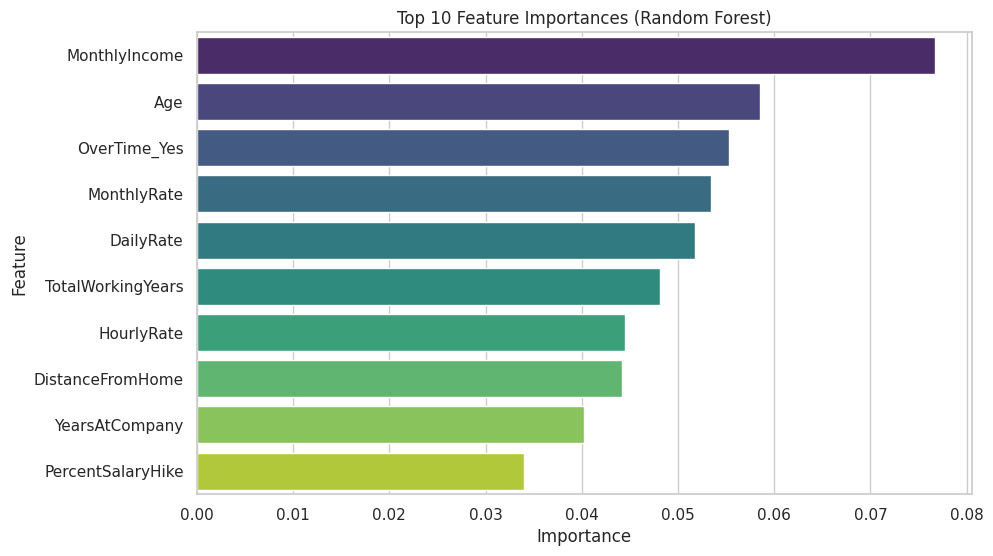

In [47]:
# 4.4 Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier


X = pd.get_dummies(df.drop('Attrition', axis=1), drop_first=True)
y = df['Attrition']
model = RandomForestClassifier(random_state=0)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [1]:
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title("Years at Company vs. Attrition")
plt.show()


<IPython.core.display.Javascript object>

NameError: name 'df' is not defined

# Feature engineering

In [56]:
df['YearsAtCompany_Bin'] = pd.cut(df['YearsAtCompany'], bins=[0, 2, 5, 10, 40], labels=['<2 yrs', '2-5 yrs', '5-10 yrs', '10+ yrs'])
df['AvgYearsPerRole'] = df['YearsAtCompany'] / (df['NumCompaniesWorked'] + 1)
df['IncomePerYear'] = df['MonthlyIncome'] * 12 / (df['YearsAtCompany'] + 1)
df['LoyaltyIndex'] = df['TotalWorkingYears'] / (df['NumCompaniesWorked'] + 1)

df['PromotionRate'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1)



# ***TOP 20 QUESTIONS ***

1. What percentage of employees are leaving the organization?

In [57]:
attrition_counts = df['Attrition'].value_counts(normalize=True) * 100
print("Attrition Percentage:\n", attrition_counts)


Attrition Percentage:
 Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


 2. Which departments have the highest attrition rates?



In [58]:
dept_attrition = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
print("Attrition Rate by Department:\n", dept_attrition)


Attrition Rate by Department:
 Attrition                       0          1
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


3. Which job roles are most affected by attrition?

In [59]:
jobrole_attrition = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index') * 100
print("Attrition Rate by Job Role:\n", jobrole_attrition)


Attrition Rate by Job Role:
 Attrition                          0          1
JobRole                                        
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturing Director     93.103448   6.896552
Research Director          97.500000   2.500000
Research Scientist         83.904110  16.095890
Sales Executive            82.515337  17.484663
Sales Representative       60.240964  39.759036


4. Does age influence the likelihood of attrition?

In [60]:
print("Age Stats by Attrition:")
print(df.groupby('Attrition')['Age'].describe())


Age Stats by Attrition:
            count       mean      std   min   25%   50%   75%   max
Attrition                                                          
0          1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
1           237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0


5. Is distance from home related to attrition ?


In [61]:
print("Distance From Home Stats by Attrition:")
print(df.groupby('Attrition')['DistanceFromHome'].describe())


Distance From Home Stats by Attrition:
            count       mean       std  min  25%  50%   75%   max
Attrition                                                        
0          1233.0   8.915653  8.012633  1.0  2.0  7.0  13.0  29.0
1           237.0  10.632911  8.452525  1.0  3.0  9.0  17.0  29.0


6. How does work-life balance impact attrition?

In [62]:
wlb_attrition = pd.crosstab(df['WorkLifeBalance'], df['Attrition'], normalize='index') * 100
print("Attrition by Work-Life Balance:\n", wlb_attrition)


Attrition by Work-Life Balance:
 Attrition                0          1
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059


7. Do employees with lower monthly income tend to leave more?

In [63]:
print("Monthly Income Stats by Attrition:")
print(df.groupby('Attrition')['MonthlyIncome'].describe())


Monthly Income Stats by Attrition:
            count         mean          std     min     25%     50%     75%  \
Attrition                                                                     
0          1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0  8834.0   
1           237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0  5916.0   

               max  
Attrition           
0          19999.0  
1          19859.0  


8. Which compensation features most impact attrition?

In [64]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
df_encoded['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
num_features = df_encoded.select_dtypes(include=['int64', 'float64']).drop(columns=['Attrition'])
target = df_encoded['Attrition']

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(num_features, target)

top_comp_features = num_features.columns[selector.get_support()]
print("Top compensation-related features impacting attrition:", top_comp_features.tolist())


Top compensation-related features impacting attrition: ['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole']


9. Does working overtime lead to higher attrition?

In [65]:
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
print("Attrition Rate by Overtime:\n", overtime_attrition)


Attrition Rate by Overtime:
 Attrition          0          1
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


10. Does job satisfaction affect attrition levels?

In [66]:
jobsat_attrition = pd.crosstab(df['JobSatisfaction'], df['Attrition'], normalize='index') * 100
print("Attrition by Job Satisfaction:\n", jobsat_attrition)


Attrition by Job Satisfaction:
 Attrition                0          1
JobSatisfaction                      
1                77.162630  22.837370
2                83.571429  16.428571
3                83.484163  16.515837
4                88.671024  11.328976


 11. Strongest numerical features correlated with attrition

In [68]:
# Ensure only numeric columns are used
numeric_df = df_encoded.select_dtypes(include=['number'])

# Compute correlation and sort
corr = numeric_df.corr()['Attrition'].sort_values(ascending=False)

# Print top 10 correlated features with Attrition
print("Top correlated numerical features:\n", corr.head(10))



Top correlated numerical features:
 Attrition             1.000000
DistanceFromHome      0.077924
NumCompaniesWorked    0.043494
MonthlyRate           0.015170
PromotionRate         0.010412
PerformanceRating     0.002889
IncomePerYear        -0.003005
HourlyRate           -0.006846
PercentSalaryHike    -0.013478
Education            -0.031373
Name: Attrition, dtype: float64


 12. Combined patterns: age, salary, distance, and satisfaction

In [69]:
multi_cols = ['Attrition', 'Age', 'MonthlyIncome', 'DistanceFromHome', 'JobSatisfaction']
print(df[multi_cols].groupby('Attrition').mean())


                 Age  MonthlyIncome  DistanceFromHome  JobSatisfaction
Attrition                                                             
0          37.561233    6832.739659          8.915653         2.778589
1          33.607595    4787.092827         10.632911         2.468354


13. Are high performers also leaving?

In [70]:
performance_attrition = pd.crosstab(df['PerformanceRating'], df['Attrition'], normalize='index') * 100
print("Attrition Rate by Performance Rating:\n", performance_attrition)


Attrition Rate by Performance Rating:
 Attrition                  0          1
PerformanceRating                      
3                  83.922830  16.077170
4                  83.628319  16.371681


 14. Do shorter tenures correlate with higher attrition?

In [72]:
df['TenureCategory'] = pd.cut(df['YearsAtCompany'], bins=[0, 2, 5, 10, 40], labels=['<2 yrs', '2-5 yrs', '5-10 yrs', '10+ yrs'])
tenure_attrition = pd.crosstab(df['TenureCategory'], df['Attrition'], normalize='index') * 100
print("Attrition Rate by Tenure Buckets:\n", tenure_attrition)


Attrition Rate by Tenure Buckets:
 Attrition               0          1
TenureCategory                      
<2 yrs          71.140940  28.859060
2-5 yrs         86.175115  13.824885
5-10 yrs        87.723214  12.276786
10+ yrs         91.869919   8.130081


15. Can LoyaltyIndex and PromotionRate together predict who might leave?

In [75]:
loyalty_promotion = df[['Attrition', 'LoyaltyIndex', 'PromotionRate']].groupby('Attrition').mean()
print("Avg Loyalty & Promotion Rate by Attrition:\n", loyalty_promotion)


Avg Loyalty & Promotion Rate by Attrition:
            LoyaltyIndex  PromotionRate
Attrition                             
0              4.459660       0.235228
1              2.808655       0.242853


 16. Are high LoyaltyIndex employees still leaving if their PromotionRate is poor?

In [76]:
bins = pd.qcut(df['LoyaltyIndex'], q=4, labels=['Low', 'Med-Low', 'Med-High', 'High'])
df['LoyaltyGroup'] = bins

loyalty_promo_attrition = pd.crosstab([df['LoyaltyGroup']], df['Attrition'], normalize='index') * 100
print("Attrition by Loyalty Group:\n", loyalty_promo_attrition)


Attrition by Loyalty Group:
 Attrition             0          1
LoyaltyGroup                      
Low           68.108108  31.891892
Med-Low       87.855297  12.144703
Med-High      86.478873  13.521127
High          93.296089   6.703911


17. Does lower average years per role correlate with higher attrition?

In [79]:
avg_role_attrition = df.groupby('Attrition')['AvgYearsPerRole'].describe()
print("Avg Years Per Role by Attrition:\n", avg_role_attrition)



Avg Years Per Role by Attrition:
             count      mean       std  min   25%       50%       75%   max
Attrition                                                                 
0          1233.0  3.357657  4.083365  0.0  0.75  2.000000  5.000000  37.0
1           237.0  2.120290  3.550604  0.0  0.50  0.833333  2.714286  33.0
